In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA as ARMA
from scipy.stats.distributions import chi2
sns.set()



C:\Users\Sruja\AppData\Local\Temp\ipykernel_11852\1446644972.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [3]:
df_comp = raw_csv_data.copy()

### Length of the Time period

In [4]:
df_comp.date.describe()


count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

### from text to date

In [5]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst= True)

In [6]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [7]:
df_comp.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

### Setting the index

Each value should correspond to a time period

we often  widh to examine specific chunk of data between two concrete dates

seperating the data before & after september 15th 2008

we neeed to use the associated time periods as indices

In [8]:
df_comp.set_index("date", inplace=True)

### date column as index because all the other columns would automatically become time series, since there is a time period attached to each value

In [9]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### setting the desired Frequency

In [10]:
df_comp = df_comp.asfreq('d')

In [11]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


### we don't want weekends to be included which gives 'NaN' values so we want only trading days

In [12]:
df_comp = df_comp.asfreq('b')

In [13]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [14]:
df_comp.tail()

,spx,dax,ftse,nikkei
date,,,,
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-29,2853.528411,13324.48,7671.533300,23629.34


In [15]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [16]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [17]:
df_comp.spx = df_comp.spx.fillna(method= "ffill")

C:\Users\Sruja\AppData\Local\Temp\ipykernel_11852\2520067099.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.spx = df_comp.spx.fillna(method= "ffill")


In [18]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [19]:
df_comp.ftse = df_comp.ftse.fillna(method= "bfill")

C:\Users\Sruja\AppData\Local\Temp\ipykernel_11852\2816636669.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.ftse = df_comp.ftse.fillna(method= "bfill")


In [20]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [21]:
df_comp.dax = df_comp.dax.fillna(value= df_comp.dax.mean())

In [22]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [23]:
df_comp.nikkei = df_comp.nikkei.fillna(method= "bfill")

C:\Users\Sruja\AppData\Local\Temp\ipykernel_11852\1180820591.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp.nikkei = df_comp.nikkei.fillna(method= "bfill")


In [24]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### SIMPLIFYING THE DATASET

In [25]:
df_comp['market_value'] = df_comp.spx

In [26]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.597179,1288.642547
std,487.868210,2752.604984,1145.568370,4043.683038,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [27]:
del df_comp['spx']

In [28]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.597179,1288.642547
std,2752.604984,1145.568370,4043.683038,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10701.130000,992.715221
50%,5774.380000,5663.300000,15030.510000,1233.761241
75%,7442.660000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [29]:
del df_comp['dax'],df_comp['ftse'],df_comp['nikkei']

In [30]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### SPLITTING THE DATA

In [31]:
size = int(len(df_comp)*0.8)

In [32]:
df = df_comp.iloc[:size]

In [33]:
df_test = df_comp.iloc[size:]

In [34]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [35]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### White noice : a special type of time-series , where the data doesn't follow a pattern or a sequence of data , where every value has a time-period associated with it

### conditions for dat to be white noice 

### 1] constant mean ; 2] constant varience ;3] no auto-correlation in any time period

### no auto corelation = no clear relatrionship betweenpast and present values

In [36]:
wn = np.random.normal(loc= df.market_value.mean(), scale= df.market_value.std(),size=len(df))

In [37]:
wn

array([1219.00600276, 1252.19817219, 1678.01758722, ..., 1259.99312694,
       1414.32718566, 1095.28987087])

In [38]:
df['wn'] = wn

C:\Users\Sruja\AppData\Local\Temp\ipykernel_11852\672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [39]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1096.575518
std,292.559287,291.806298
min,438.920000,-72.408763
25%,914.620000,897.595709
50%,1144.650000,1097.590698
75%,1316.280729,1289.472781
max,1570.252238,2051.386820


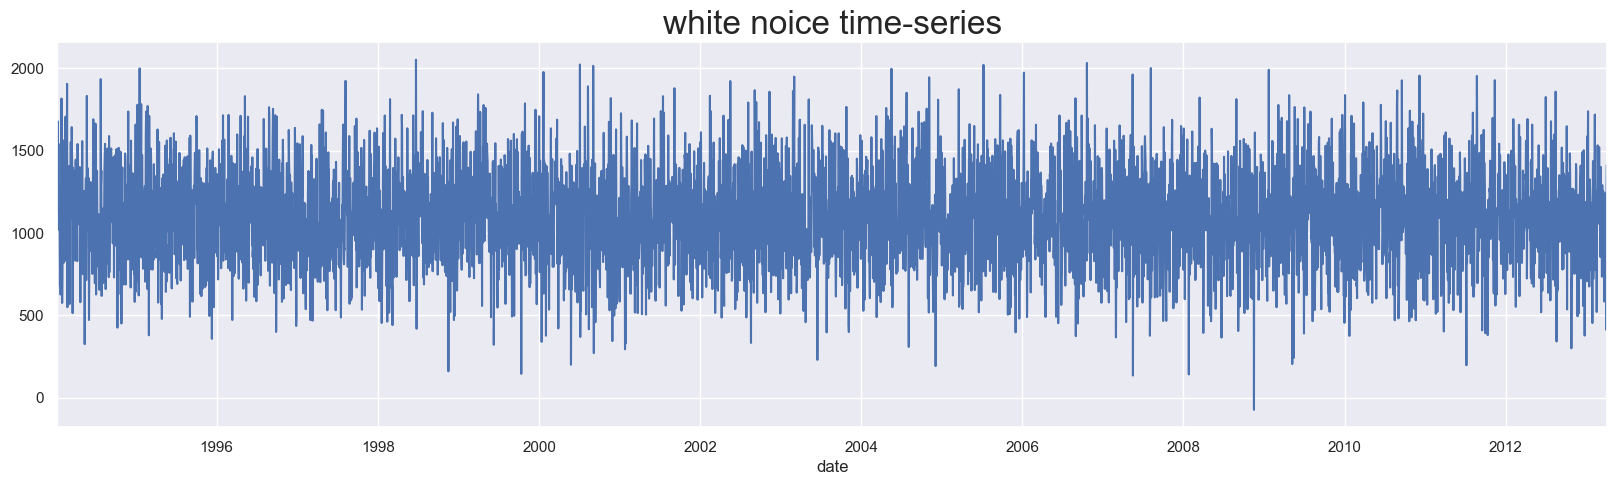

In [40]:
df.wn.plot(figsize=(20,5))
plt.title("white noice time-series",size= 24)
plt.show()

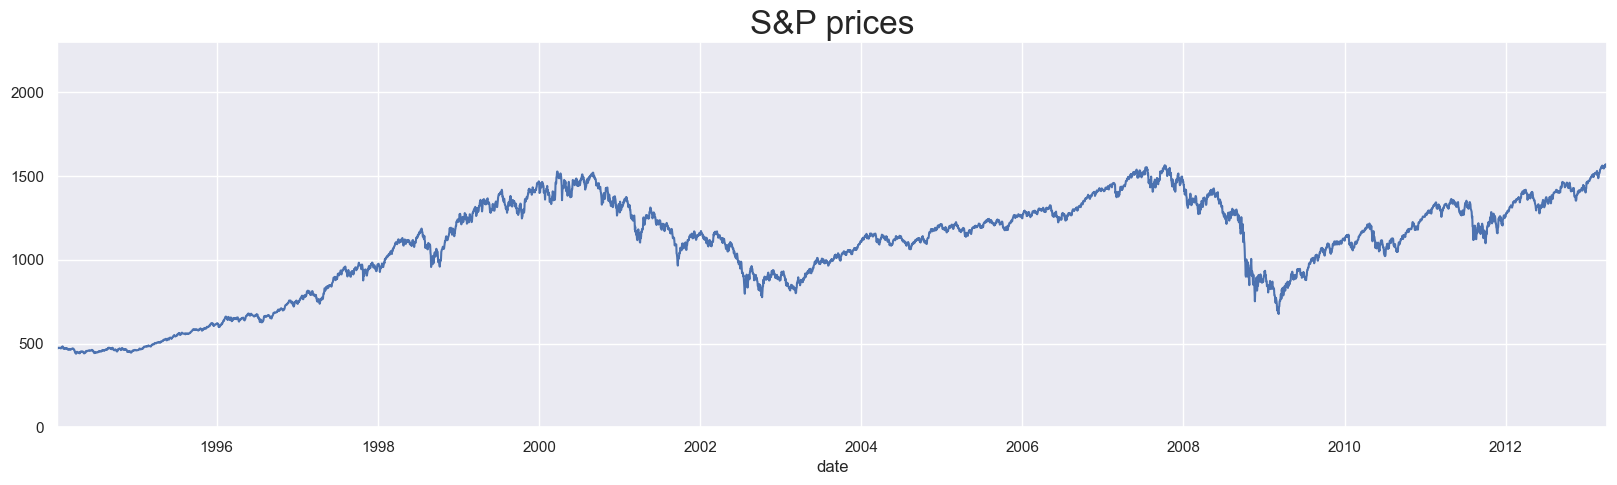

In [41]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P prices",size=24)
plt.ylim(0,2300)
plt.show()

## Random walk

### a special type of time-series , where values tend to persist over time and the differences betweeen periods are simply white noice

#### p(t) = prices ; ɛ(t) = residuals 

### p(t) = p(t-1) + ɛ(t)

In [42]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst= True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')

In [43]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [44]:
df['rw'] = rw.price

C:\Users\Sruja\AppData\Local\Temp\ipykernel_11852\818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [45]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1219.006003,1122.139662
1994-01-10,475.27,1252.198172,1080.347860
1994-01-11,474.13,1678.017587,1082.095245
1994-01-12,474.17,1125.829611,1083.639265
1994-01-13,472.47,1542.077640,1067.146255


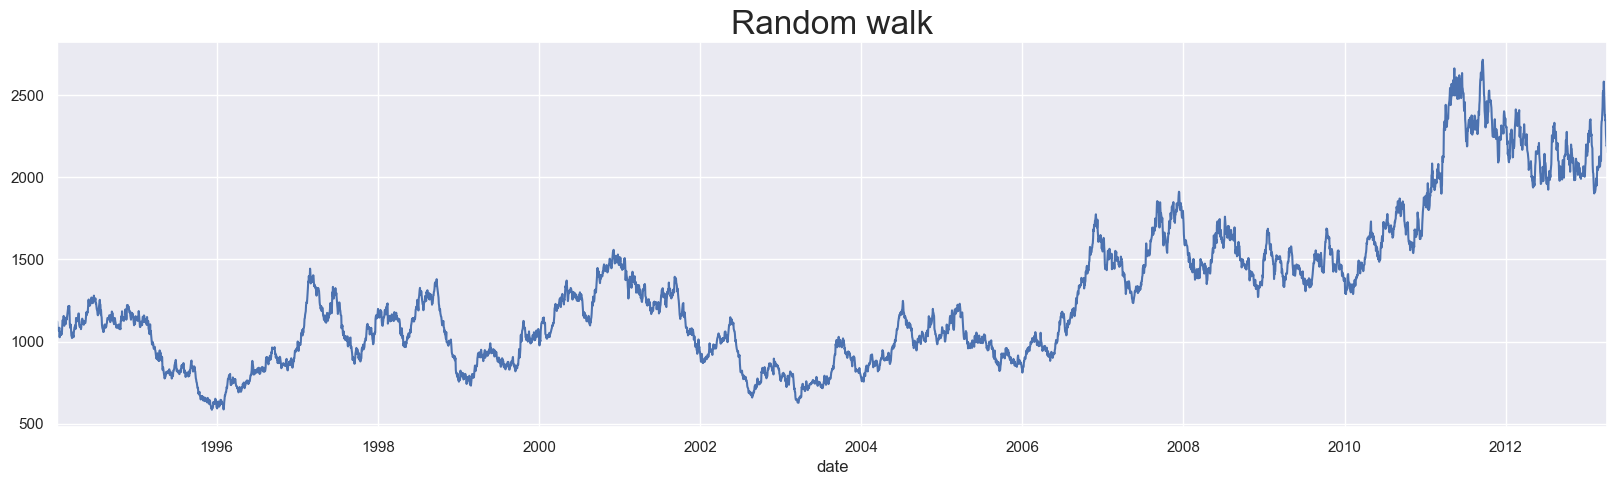

In [46]:
df.rw.plot(figsize=(20,5))

plt.title("Random walk",size=24)
#plt.ylim(0,2300)
plt.show()

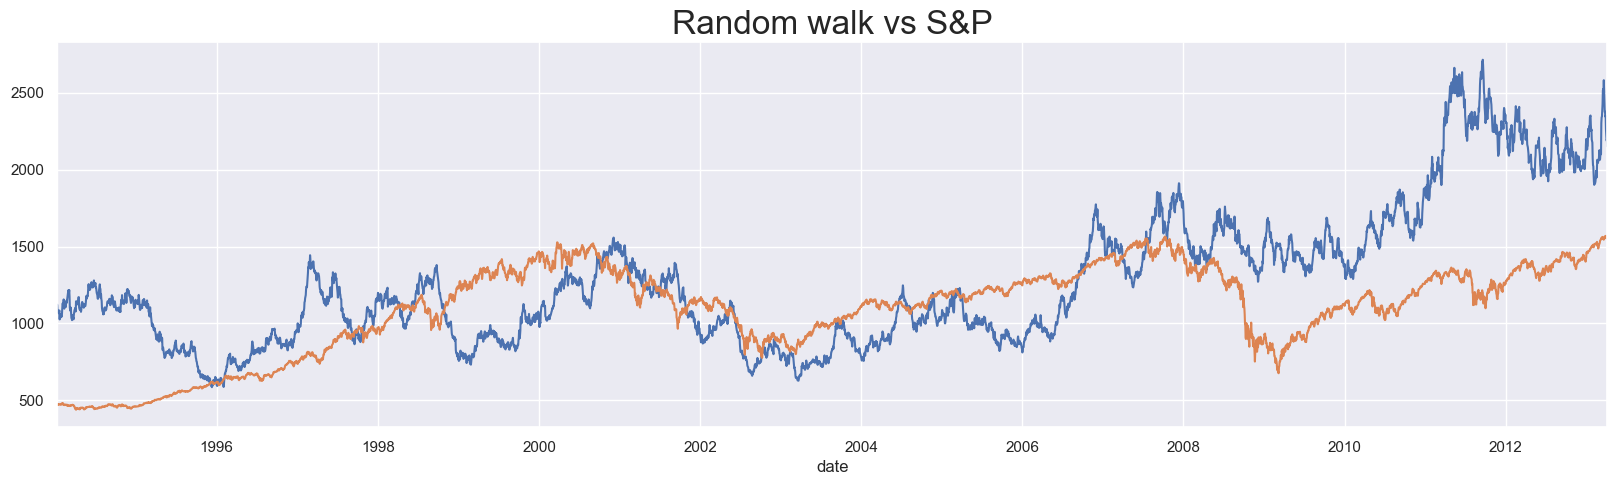

In [47]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()

plt.title("Random walk vs S&P",size=24)
#plt.ylim(0,2300)
plt.show()

### market efficiency :measures the level of dificulty in forecasting correct future values

### Arbitrage : Buy and sell commodities and make a safe profit, while the price adjusts 

.

# Stationarity 

### Time series Stationarity implies that taking consecutive samples of data with the same size should have identical co-variences regardless of the starting point

### also called as "weak form stationarity" or "covarience stationarity"

### conditions :
### constant mean
### constant varience
### constant covariance between periods at an identical distance 

### i.e cov[Xn,X(n+k)] = cov[(Xm,X(m+k))]

In [48]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [49]:
sts.adfuller(df.wn)

(-70.77211643593034,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70775.37269472348)

In [50]:
sts.adfuller(df.rw)

(-1.3286073927689714,
 0.6159849181617386,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## seasonality : certain trends will appear in cyclical basis
### testing methods: 
### 1] decomposition 
    split into 3 effects 
    trend - pattern
    seasonal - cyclical effects 
    residual - error of prediction 

additive add all three
multipicative multipy all 3 
    

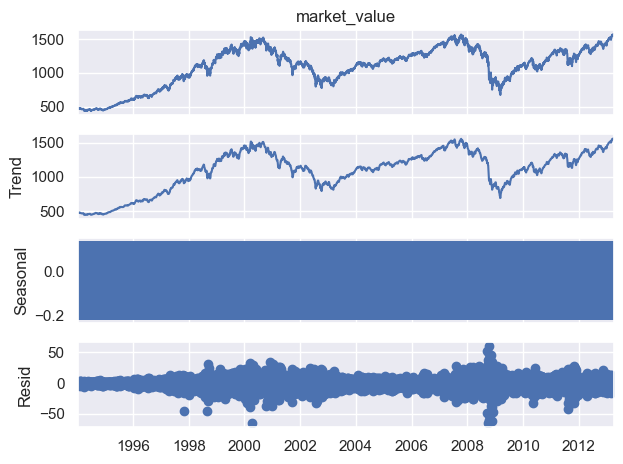

In [51]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

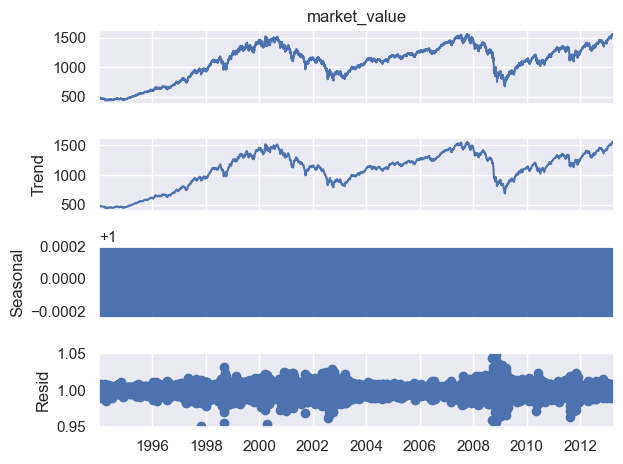

In [52]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.ylim(0.95,1.05)
plt.show()

## ACF

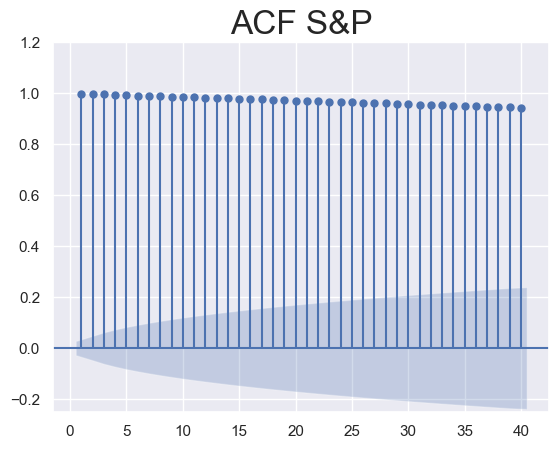

In [53]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.ylim(-0.25,1.2)
plt.show()

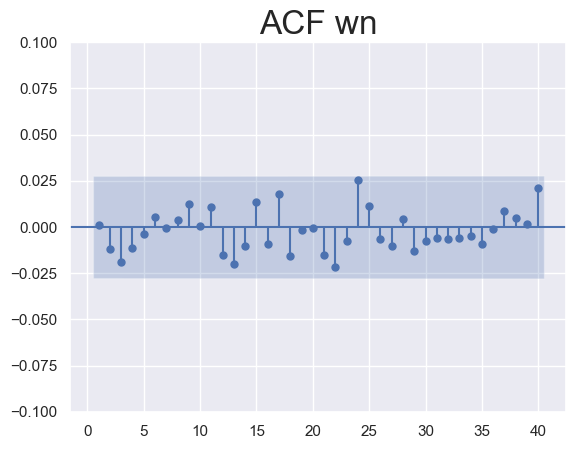

In [54]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF wn", size = 24)
plt.ylim(-0.1,0.1)
plt.show()

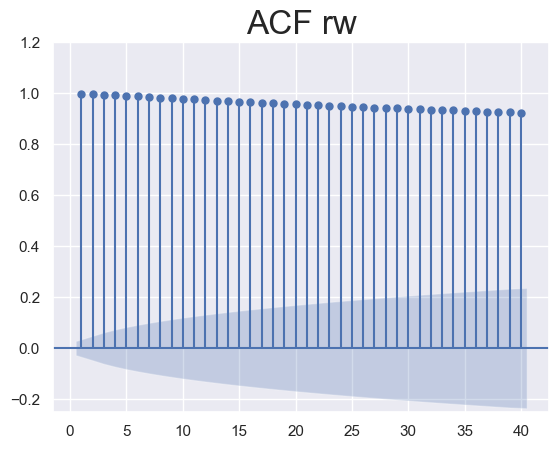

In [55]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF rw", size = 24)
plt.ylim(-0.25,1.2)
plt.show()

## PACF

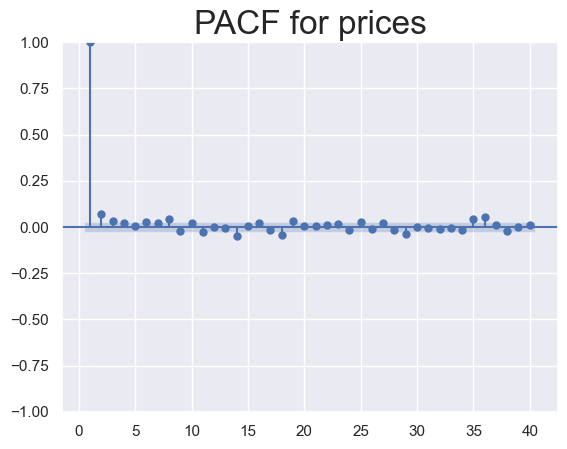

In [56]:
sgt.plot_pacf(df.market_value, lags = 40, alpha =0.05,zero = False, method = ('ols'))
plt.title("PACF for prices", size = 24)
plt.show()

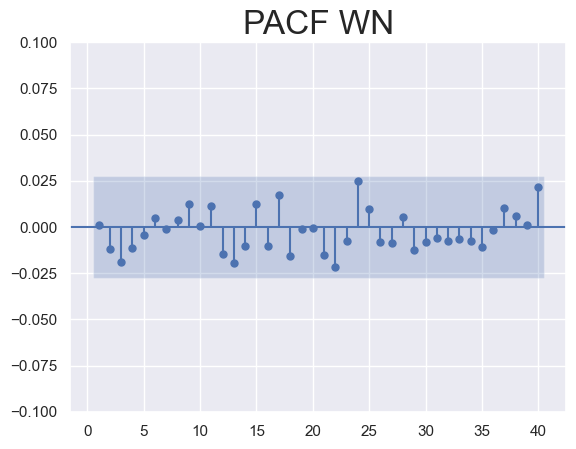

In [57]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.ylim(-0.1,0.1)
plt.show()


## AutoRegression Model [AR (1) ]

In [58]:
model_ar = ARMA(df.market_value, order = (1,0,0))

In [59]:
results_ar = model_ar.fit()

In [60]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -20097.439
Date:                Fri, 01 Mar 2024   AIC                          40200.879
Time:                        15:11:12   BIC                          40220.443
Sample:                    01-07-1994   HQIC                         40207.734
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6133    165.184      6.608      0.000     767.858    1415.369
ar.L1          0.9992      0.001   1695.377      0.000       0.998       1.000
sigma2       175.2480      1.771     98.978      0.000     171.778     178.718
===================================================================================
Ljung-Box (L1) (Q):                  24.60   Jarque-Bera (JB):              7473.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## higher-lag AR models

In [61]:
model_ar_2 = ARMA(df.market_value, order = (2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -20085.289
Date:                Fri, 01 Mar 2024   AIC                          40178.578
Time:                        15:11:13   BIC                          40204.664
Sample:                    01-07-1994   HQIC                         40187.719
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6076    223.343      4.888      0.000     653.863    1529.352
ar.L1          0.9300      0.009     99.031      0.000       0.912       0.948
ar.L2          0.0694      0.009      7.405      0.000       0.051       0.088
sigma2       174.3966      1.768     98.654      0.000     170.932     177.861
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              7475.27
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
model_ar_3 = ARMA(df.market_value, order = (3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -20083.003
Date:                Fri, 01 Mar 2024   AIC                          40176.005
Time:                        15:11:14   BIC                          40208.612
Sample:                    01-07-1994   HQIC                         40187.431
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6519    119.496      9.135      0.000     857.444    1325.860
ar.L1          0.9271      0.009     97.886      0.000       0.909       0.946
ar.L2          0.0376      0.012      3.227      0.001       0.015       0.060
ar.L3          0.0342      0.008      4.437      0.000       0.019       0.049
sigma2       174.1643      1.799     96.828      0.000     170.639     177.690
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7224.32
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.24   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
model_ar_4 = ARMA(df.market_value, order = (4,0,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -20081.936
Date:                Fri, 01 Mar 2024   AIC                          40175.873
Time:                        15:11:14   BIC                          40215.001
Sample:                    01-07-1994   HQIC                         40189.584
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6519    121.399      8.992      0.000     853.713    1329.590
ar.L1          0.9264      0.009     97.776      0.000       0.908       0.945
ar.L2          0.0368      0.012      3.147      0.002       0.014       0.060
ar.L3          0.0148      0.012      1.272      0.203      -0.008       0.038
ar.L4          0.0208      0.009      2.249      0.025       0.003       0.039
sigma2       174.1229      1.800     96.734      0.000     170.595     177.651
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7229.16
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### LLR TEST

In [64]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

mod1,2 models we wnat to compare , DF: degree of freedom 

### comparing Higher-Lag AR models

In [65]:
model_ar_2 = ARMA(df.market_value, order = (2,0,0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())
print("LLR test: " + str(LLR_test(model_ar, model_ar_2)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -20085.289
Date:                Fri, 01 Mar 2024   AIC                          40178.578
Time:                        15:11:15   BIC                          40204.664
Sample:                    01-07-1994   HQIC                         40187.719
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6076    223.343      4.888      0.000     653.863    1529.352
ar.L1          0.9300      0.009     99.031      0.000       0.912       0.948
ar.L2          0.0694      0.009      7.405      0.0

In [66]:
model_ar_3 = ARMA(df.market_value, order = (3,0,0))
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary())
print("LLR test: " + str(LLR_test(model_ar_2, model_ar_3)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -20083.003
Date:                Fri, 01 Mar 2024   AIC                          40176.005
Time:                        15:11:19   BIC                          40208.612
Sample:                    01-07-1994   HQIC                         40187.431
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6519    119.496      9.135      0.000     857.444    1325.860
ar.L1          0.9271      0.009     97.886      0.000       0.909       0.946
ar.L2          0.0376      0.012      3.227      0.0

In [67]:
model_ar_4 = ARMA(df.market_value, order = (4,0,0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -20081.936
Date:                Fri, 01 Mar 2024   AIC                          40175.873
Time:                        15:11:22   BIC                          40215.001
Sample:                    01-07-1994   HQIC                         40189.584
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6519    121.399      8.992      0.000     853.713    1329.590
ar.L1          0.9264      0.009     97.776      0.000       0.908       0.945
ar.L2          0.0368      0.012      3.147      0.0

In [68]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_3, DF = 3)))

LLR test: 0.0


## The DF-Test

### by testing this we can see if the dataset is stationary or non stationary, if test stat is less than [<] critical [1%,5% or 10%] significance value then its stationary 

In [69]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

### 0.4 > -2.86 , non stationary 

## Using Returns

the % change between the values for the two consecutive periods 

r>0 increase in price , and r<0 is decreased in price

In [70]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

C:\Users\Sruja\AppData\Local\Temp\ipykernel_11852\767974315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


In [71]:
sts.adfuller(df.returns)

(-17.03445719098125,
 8.280537020316117e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345134)

### so here we can see -17 <<< -3.43 [1% level] , Stationary 

## ACF AND PACF FOR RETURNS

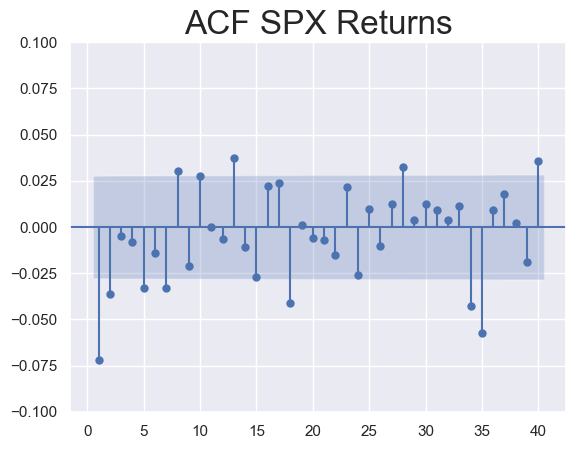

In [72]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("ACF SPX Returns", size=24)
plt.ylim(-0.1,0.1)
plt.show()

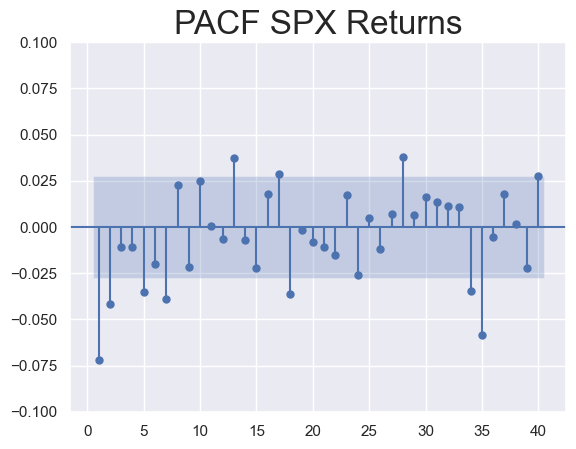

In [73]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF SPX Returns", size=24)
plt.ylim(-0.1,0.1)
plt.show()

## AR(1) for Returns

In [74]:
model_ret_ar_1 = ARMA(df.returns, order = (1,0,0))
results_ret_ar_1 = model_ret_ar_1.fit()
print(results_ret_ar_1.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_1, model_ret_ar_1)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -8067.541
Date:                Fri, 01 Mar 2024   AIC                          16141.081
Time:                        15:11:25   BIC                          16160.645
Sample:                    01-10-1994   HQIC                         16147.937
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.915      0.055      -0.001       0.063
ar.L1         -0.0719      0.008     -8.514      0.000      -0.088      -0.055
sigma2         1.4568      0.013    114.005      0.0

## Higher-Lag AR Models for Returns
## RUN THIS TILL YOU GET 
### THE ADDITIONALCO-EFF IS INSIGNIFICANT
### THE LLR TEST FAILS
### HIGHER AIC OR BIC VALUE

In [75]:
model_ret_ar_2 = ARMA(df.returns, order = (2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
print(results_ret_ar_2.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_1, model_ret_ar_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -8063.177
Date:                Fri, 01 Mar 2024   AIC                          16134.354
Time:                        15:11:25   BIC                          16160.439
Sample:                    01-10-1994   HQIC                         16143.494
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.963      0.050    5.43e-05       0.062
ar.L1         -0.0749      0.009     -8.788      0.000      -0.092      -0.058
ar.L2         -0.0417      0.007     -6.035      0.0

In [76]:
model_ret_ar_3 = ARMA(df.returns, order = (3,0,0))
results_ret_ar_3 = model_ret_ar_3.fit()
print(results_ret_ar_3.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_2, model_ret_ar_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -8062.879
Date:                Fri, 01 Mar 2024   AIC                          16135.758
Time:                        15:11:27   BIC                          16168.364
Sample:                    01-10-1994   HQIC                         16147.184
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.971      0.049       0.000       0.062
ar.L1         -0.0753      0.009     -8.850      0.000      -0.092      -0.059
ar.L2         -0.0425      0.007     -6.159      0.0

In [77]:
model_ret_ar_4 = ARMA(df.returns, order = (4,0,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -8062.596
Date:                Fri, 01 Mar 2024   AIC                          16137.192
Time:                        15:11:28   BIC                          16176.319
Sample:                    01-10-1994   HQIC                         16150.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.964      0.050    5.86e-05       0.062
ar.L1         -0.0755      0.009     -8.838      0.000      -0.092      -0.059
ar.L2         -0.0429      0.007     -6.217      0.0

## so lets choose ar_2 because ar_3&4 exceeds the LLR test

# Normalize values

In [78]:
benchmark = df.market_value.iloc[0]


In [79]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [80]:
df.head()

,market_value,wn,rw,returns,norm
date,,,,,
1994-01-10,475.27,1252.198172,1080.347860,1.142796,100.000000
1994-01-11,474.13,1678.017587,1082.095245,-0.239864,99.760136
1994-01-12,474.17,1125.829611,1083.639265,0.008437,99.768553
1994-01-13,472.47,1542.077640,1067.146255,-0.358521,99.410861
1994-01-14,474.91,1021.395705,1080.129720,0.516435,99.924254


In [81]:
sts.adfuller(df.norm)

(-1.7396871077371279,
 0.41078913382078747,
 18,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 24351.278699350325)

### since the data is non-stationary lets try normalize returns

# Normalize the returns

In [82]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

In [83]:
df['norm_ret']

date
1994-01-10    100.000000
1994-01-11    -20.989187
1994-01-12      0.738233
1994-01-13    -31.372275
1994-01-14     45.190459
                 ...    
2013-04-01    -39.102169
2013-04-02     45.250898
2013-04-03    -92.312390
2013-04-04     35.438855
2013-04-05    -37.584791
Freq: B, Name: norm_ret, Length: 5020, dtype: float64

In [84]:
sts.adfuller(df.norm_ret)

(-17.03445719098115,
 8.280537020317417e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 60636.5822032878)

### the data is stationary

## ARIMA 

In [85]:
model_norm_ret_ar_1 = ARMA(df.norm_ret, order = (1,0,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
print(results_norm_ret_ar_1.summary())
#print ("LLR test: " + str(LLR_test(model_norm_ret_ar_, model_norm_ret_ar_)))

                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -30515.434
Date:                Fri, 01 Mar 2024   AIC                          61036.869
Time:                        15:11:30   BIC                          61056.432
Sample:                    01-10-1994   HQIC                         61043.724
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7256      1.423      1.915      0.055      -0.063       5.515
ar.L1         -0.0719      0.008     -8.514      0.000      -0.088      -0.055
sigma2      1.116e+04     97.856    114.000      0.0

In [86]:
model_norm_ret_ar_2 = ARMA(df.returns, order = (2,0,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
print(results_norm_ret_ar_2.summary())
print ("LLR test: " + str(LLR_test(model_norm_ret_ar_1, model_norm_ret_ar_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -8063.177
Date:                Fri, 01 Mar 2024   AIC                          16134.354
Time:                        15:11:30   BIC                          16160.439
Sample:                    01-10-1994   HQIC                         16143.494
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.963      0.050    5.43e-05       0.062
ar.L1         -0.0749      0.009     -8.788      0.000      -0.092      -0.058
ar.L2         -0.0417      0.007     -6.035      0.0

In [87]:
model_norm_ret_ar_3 = ARMA(df.returns, order = (3,0,0))
results_norm_ret_ar_3 = model_norm_ret_ar_3.fit()
print(results_norm_ret_ar_3.summary())
print ("LLR test: " + str(LLR_test(model_norm_ret_ar_2, model_norm_ret_ar_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -8062.879
Date:                Fri, 01 Mar 2024   AIC                          16135.758
Time:                        15:11:31   BIC                          16168.364
Sample:                    01-10-1994   HQIC                         16147.184
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.971      0.049       0.000       0.062
ar.L1         -0.0753      0.009     -8.850      0.000      -0.092      -0.059
ar.L2         -0.0425      0.007     -6.159      0.0

## even the normalized values of returns give the same model ar_2 as the best fit

# Analyzing the residuals 

In [88]:
df['res_price'] = results_ar_2.resid

In [89]:
df['res_price'].describe()

count    5020.000000
mean        0.230850
std        13.202787
min      -106.287013
25%        -5.032705
50%         0.456411
75%         6.028798
max       103.285315
Name: res_price, dtype: float64

In [90]:
df.res_price.var()

174.31357341033424

In [91]:
sts.adfuller(df.res_price)

(-16.49398413821895,
 2.1792568164977403e-29,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39896.50885391605)

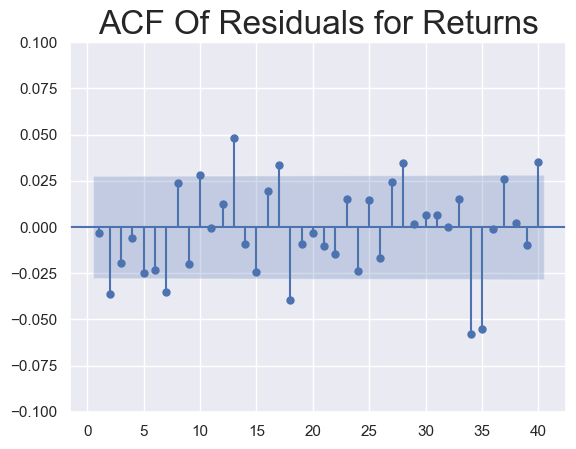

In [92]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.ylim(-0.1,0.1)
plt.show()

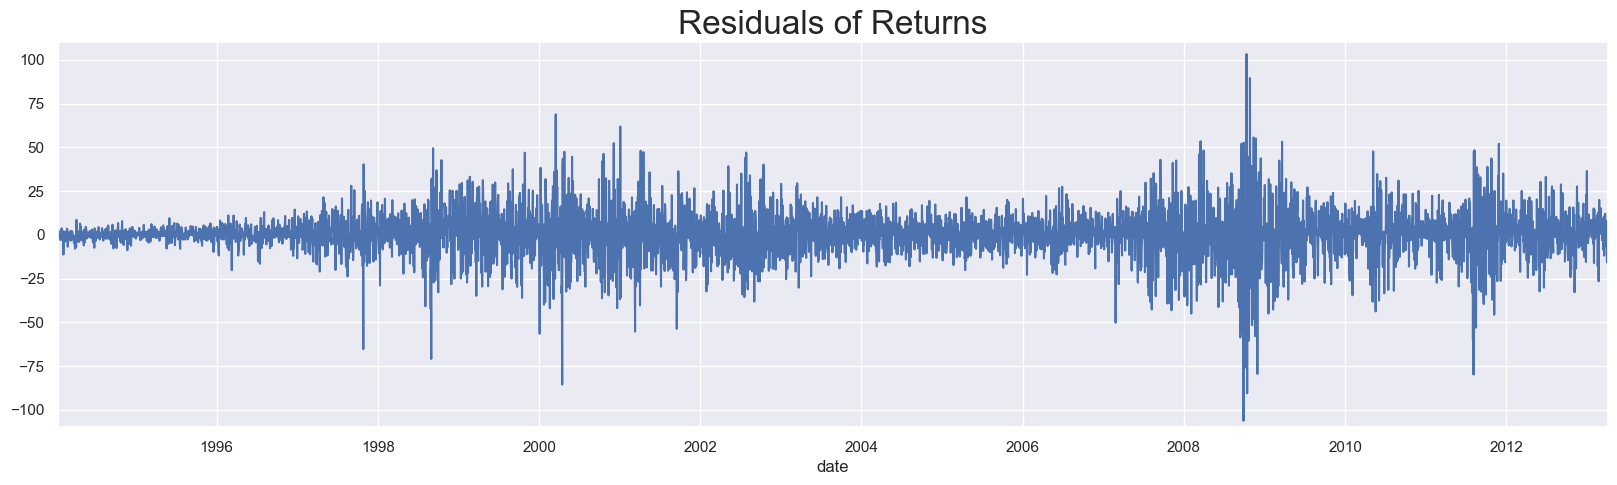

In [93]:
df.res_price.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.ylim(-110,110)
plt.show()

## lets do the same for returns 

In [94]:
df['res_ret'] = results_ret_ar_2.resid

In [95]:
df['res_ret'].describe()

count    5020.000000
mean        0.000020
std         1.206075
min        -8.891664
25%        -0.515002
50%         0.025833
75%         0.537812
max        11.140586
Name: res_ret, dtype: float64

In [96]:
df.res_ret.var()

1.4546171200548632

In [97]:
sts.adfuller(df.res_ret)

(-16.961420305258354,
 9.302280007300462e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.800317293031)

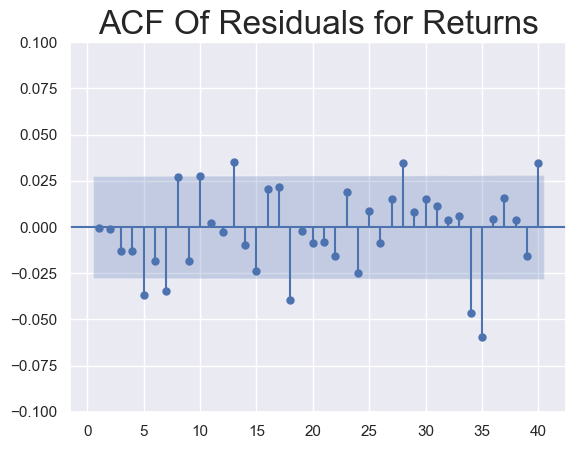

In [98]:
sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.ylim(-0.1,0.1)
plt.show()

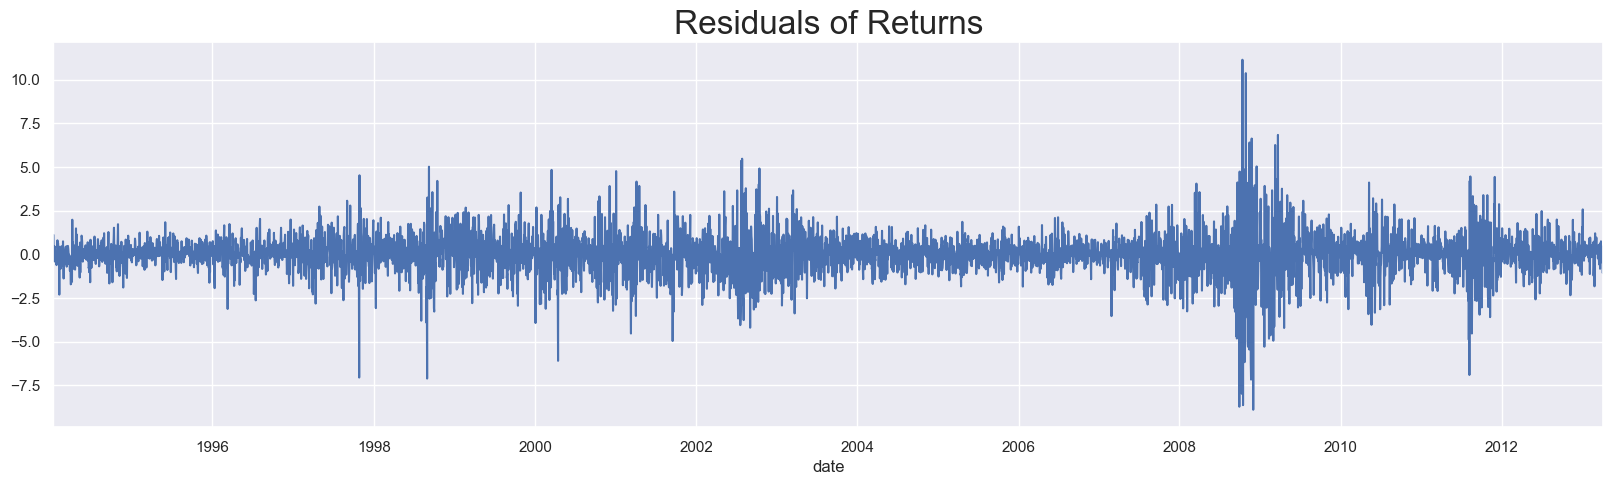

In [99]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
#plt.ylim(-110,110)
plt.show()

In [100]:
df['returns'] = df.market_value.pct_change(1).mul(100)

In [101]:
df

,market_value,wn,rw,returns,norm,norm_ret,res_price,res_ret
date,,,,,,,,
1994-01-10,475.270000,1252.198172,1080.347860,NaN,100.000000,100.000000,4.991556,1.111660
1994-01-11,474.130000,1678.017587,1082.095245,-0.239864,99.760136,-20.989187,-1.116474,-0.191076
1994-01-12,474.170000,1125.829611,1083.639265,0.008437,99.768553,0.738233,-0.388898,0.003330
1994-01-13,472.470000,1542.077640,1067.146255,-0.358521,99.410861,-31.372275,-2.046986,-0.402651
1994-01-14,474.910000,1021.395705,1080.129720,0.516435,99.924254,45.190459,1.971299,0.455171
...,...,...,...,...,...,...,...,...
2013-04-01,1562.173837,950.351691,2263.675474,-0.446858,328.691867,-39.102169,-6.741500,-0.464737
2013-04-02,1570.252238,413.227210,2225.000870,0.517126,330.391617,45.250898,7.858346,0.448894
2013-04-03,1553.686978,1259.993127,2190.787688,-1.054943,326.906175,-92.312390,-15.733499,-1.069601


# MA(1) for returns

In [102]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -8064.904
Date:                Fri, 01 Mar 2024   AIC                          16135.809
Time:                        15:11:35   BIC                          16155.372
Sample:                    01-11-1994   HQIC                         16142.664
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0309      0.016      1.911      0.056      -0.001       0.063
ma.L1         -0.0781      0.008     -9.241      0.000      -0.095      -0.062
sigma2         1.4562      0.013    112.931      0.000       1.431       1.482
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             14761.16
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print ("\nLLR test p-value: " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -8061.245
Date:                Fri, 01 Mar 2024   AIC                          16130.491
Time:                        15:11:35   BIC                          16156.575
Sample:                    01-11-1994   HQIC                         16139.631
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0309      0.016      1.959      0.050   -1.09e-05       0.062
ma.L1         -0.0759      0.008     -8.955      0.000      -0.092      -0.059
ma.L2         -0.0389      0.007     -5.643      0.0

In [104]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print ("\nLLR test p-value: " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -8060.989
Date:                Fri, 01 Mar 2024   AIC                          16131.977
Time:                        15:11:37   BIC                          16164.582
Sample:                    01-11-1994   HQIC                         16143.402
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0309      0.016      1.968      0.049       0.000       0.062
ma.L1         -0.0758      0.008     -8.921      0.000      -0.092      -0.059
ma.L2         -0.0389      0.007     -5.632      0.0

### 3 lag value fails LLR test

# Residuals of the results

In [105]:
df['res_ret_ma_2'] = results_ret_ma_2.resid[1:]

In [106]:
df.res_ret_ma_2.describe().round(3)

count    5018.000
mean        0.000
std         1.206
min        -8.864
25%        -0.515
50%         0.027
75%         0.539
max        11.095
Name: res_ret_ma_2, dtype: float64

In [107]:
df.res_ret_ma_2.var().round(3)

1.455

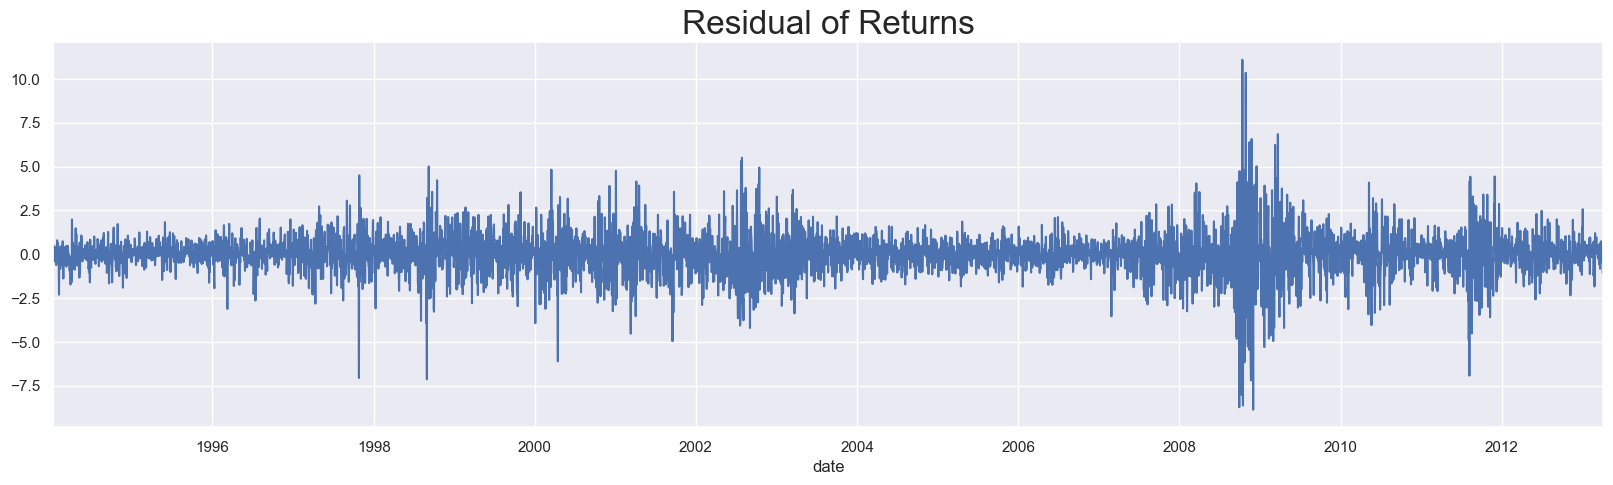

In [108]:
df.res_ret_ma_2[1:].plot(figsize = (20,5))
plt.title("Residual of Returns", size = 24)
plt.show()

In [109]:
sts.adfuller(df.res_ret_ma_2[2:])

(-16.932561997647714,
 9.752085989429266e-30,
 17,
 5000,
 {'1%': -3.431658532075464, '5%': -2.8621182296803203, '10%': -2.56707779236},
 16030.034414880334)

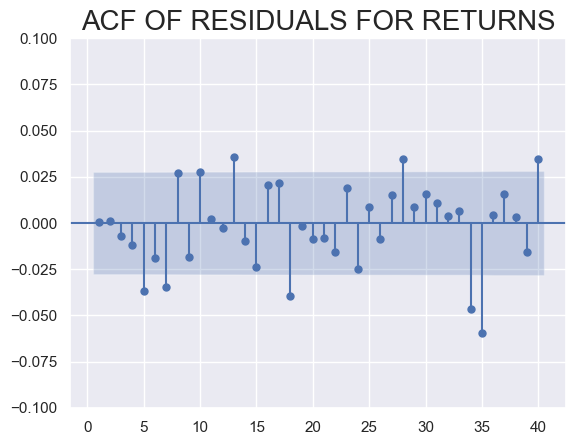

In [110]:
sgt.plot_acf(df.res_ret_ma_2[2:], zero = False, lags = 40)
plt.title("ACF OF RESIDUALS FOR RETURNS", size = 20)
plt.ylim(-0.1,0.1)
plt.show()

# normalized returns

In [111]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

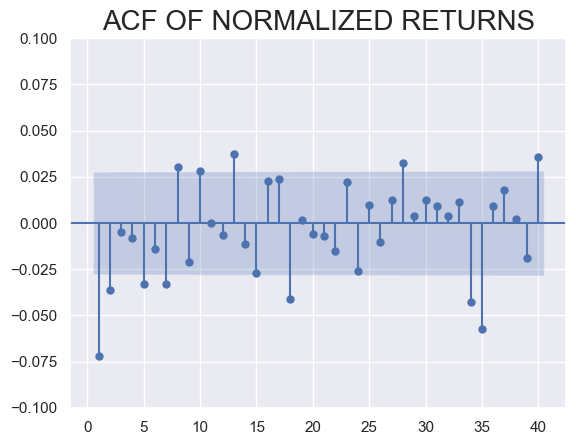

In [112]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF OF NORMALIZED RETURNS", size = 20)
plt.ylim(-0.1,0.1)
plt.show()

In [113]:
model_norm_ret_ma_2 = ARMA(df.norm_ret[1:], order = (0,0,2))
results_norm_ret_ma_2 = model_norm_ret_ma_2.fit()
print(results_norm_ret_ma_2.summary())
#print ("LLR test: " + str(LLR_test(model_norm_ret_ar_1, model_norm_ret_ar_2)))

                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -38340.146
Date:                Fri, 01 Mar 2024   AIC                          76688.293
Time:                        15:11:40   BIC                          76714.376
Sample:                    01-11-1994   HQIC                         76697.433
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8934      6.592     -1.956      0.050     -25.814       0.028
ma.L1         -0.0759      0.008     -8.942      0.000      -0.093      -0.059
ma.L2         -0.0389      0.007     -5.635      0.0

In [114]:
df['res_norm_ret_ma_2'] = results_ret_ma_2.resid[1:]

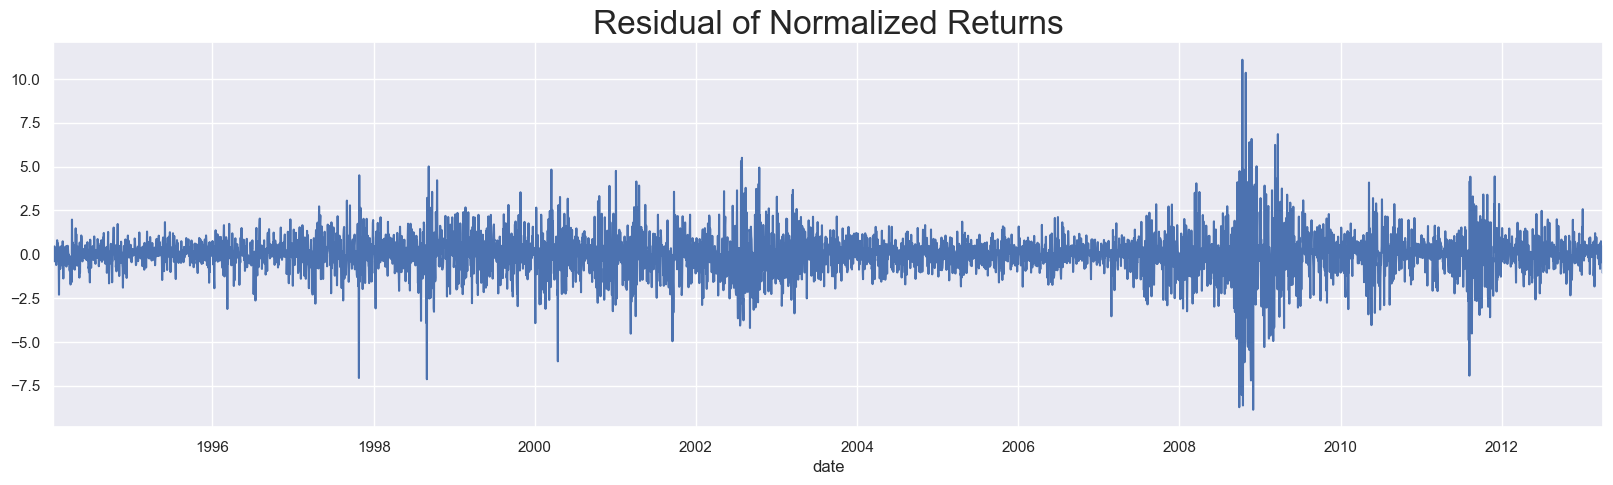

In [115]:
df.res_norm_ret_ma_2[1:].plot(figsize = (20,5))
plt.title("Residual of Normalized Returns", size = 24)
plt.show()

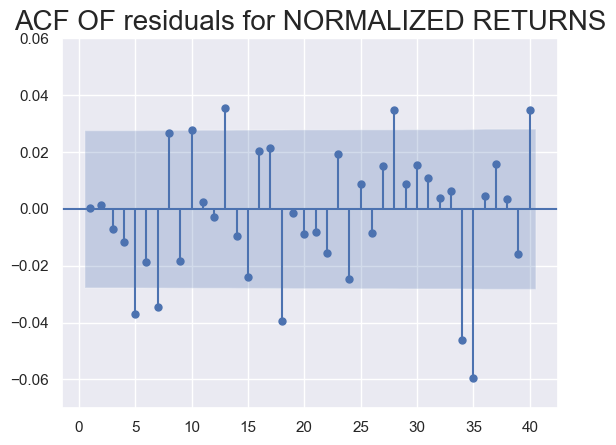

In [116]:
sgt.plot_acf(df.res_norm_ret_ma_2[2:], zero = False, lags = 40)
plt.title("ACF OF residuals for NORMALIZED RETURNS", size = 20)
plt.ylim(-0.07,0.06)
plt.show()

# MA MODELS FOR PRICES

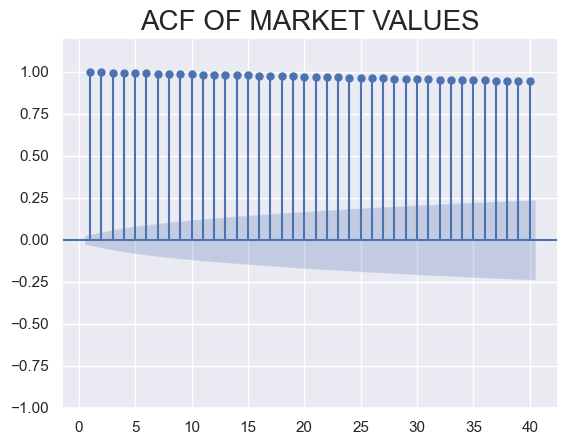

In [117]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF OF MARKET VALUES", size = 20)
plt.ylim(-1,1.2)
plt.show()

In [118]:
model_ma_1 = ARMA(df.market_value, order = (0,0,1))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())
#print("LLR test: " + str(LLR_test(model_ma_1, model_ma_2)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -32317.174
Date:                Fri, 01 Mar 2024   AIC                          64640.347
Time:                        15:11:42   BIC                          64659.911
Sample:                    01-10-1994   HQIC                         64647.203
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.7858      4.934    221.297      0.000    1082.116    1101.455
ma.L1          0.9696      0.004    219.762      0.000       0.961       0.978
sigma2      2.286e+04    607.728     37.610      0.0

# ARMA MODEL TOGETHER 

In [119]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order = (1,0,1))
results_ret_ar_1_ma_1= model_ret_ar_1_ma_1.fit()
print(results_ret_ar_1_ma_1.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_1_ma_1, model_ret_ar_1_ma_1)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8059.092
Date:                Fri, 01 Mar 2024   AIC                          16126.184
Time:                        15:11:43   BIC                          16152.267
Sample:                    01-11-1994   HQIC                         16135.324
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0310      0.015      2.039      0.041       0.001       0.061
ar.L1          0.6110      0.053     11.462      0.000       0.507       0.716
ma.L1         -0.6817      0.048    -14.156      0.0

In [120]:
print("\nLLR test ARMA vs AR: " + str(LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1)))
print("\nLLR test ARMA vs MA: " + str(LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1)))


LLR test ARMA vs AR: 0.0

LLR test ARMA vs MA: 0.001


In [121]:
model_ret_ar_2_ma_2 = ARMA(df.returns[1:], order = (2,0,2))
results_ret_ar_2_ma_2= model_ret_ar_2_ma_2.fit()
print(results_ret_ar_2_ma_2.summary())
print("LLR test: " + str(LLR_test(model_ret_ar_1_ma_1, model_ret_ar_2_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -8058.971
Date:                Fri, 01 Mar 2024   AIC                          16129.942
Time:                        15:11:47   BIC                          16169.068
Sample:                    01-11-1994   HQIC                         16143.652
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0310      0.015      2.034      0.042       0.001       0.061
ar.L1          0.1292      0.864      0.150      0.881      -1.564       1.822
ar.L2          0.3278      0.523      0.627      0.5

In [122]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order = (3,0,3))
results_ret_ar_3_ma_3= model_ret_ar_3_ma_3.fit()
print(results_ret_ar_3_ma_3.summary())
print("LLR test: " + str(LLR_test(model_ret_ar_2_ma_2, model_ret_ar_3_ma_3)))

C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -8055.948
Date:                Fri, 01 Mar 2024   AIC                          16127.896
Time:                        15:11:56   BIC                          16180.064
Sample:                    01-11-1994   HQIC                         16146.177
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0312      0.015      2.032      0.042       0.001       0.061
ar.L1          1.1664      0.093     12.507      0.000       0.984       1.349
ar.L2         -1.1168      0.120     -9.307      0.0

C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


LLR test: 0.014


In [127]:
model_ret_ar_3_ma_4 = ARMA(df.returns[1:], order = (3,0,4))
results_ret_ar_3_ma_4 = model_ret_ar_3_ma_4.fit()
print(results_ret_ar_3_ma_4.summary())
print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_3, model_ret_ar_3_ma_4)))

C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -8053.135
Date:                Fri, 01 Mar 2024   AIC                          16124.270
Time:                        15:16:53   BIC                          16182.959
Sample:                    01-11-1994   HQIC                         16144.836
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0305      0.016      1.953      0.051      -0.000       0.061
ar.L1         -0.8945      0.129     -6.956      0.000      -1.147      -0.642
ar.L2          0.5282      0.142      3.728      0.0

C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


LLR test: 0.018


In [126]:
print("\n ARMA(3,3): \tLL", results_ret_ar_3_ma_3.llf, "\tAIC = ", results_ret_ar_3_ma_3.aic)
print("\n ARMA(3,4): \tLL", results_ret_ar_3_ma_4.llf, "\tAIC = ", results_ret_ar_3_ma_4.aic)


 ARMA(3,3): 	LL -8055.948020447842 	AIC =  16127.896040895685

 ARMA(3,4): 	LL -8053.135129352315 	AIC =  16124.27025870463


## we can select ARMA(3,4)

# Residuals for Returns

In [128]:
df['res_ret_ar_3_ma_4'] = results_ret_ar_3_ma_4.resid[1:]

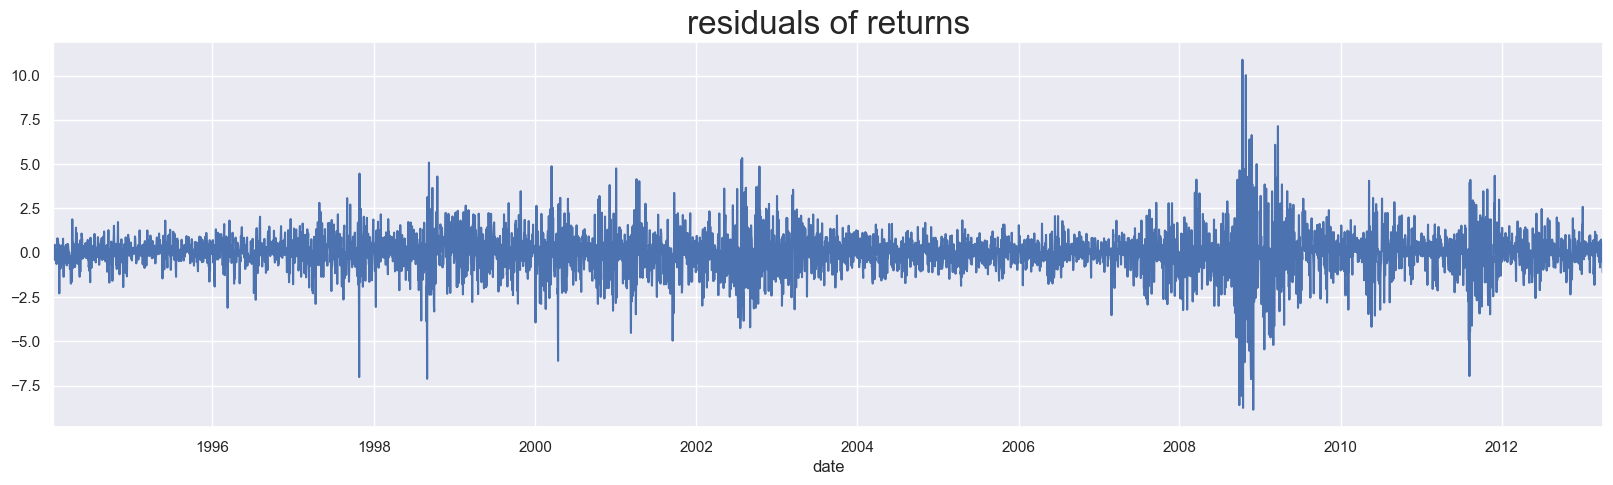

In [129]:
df.res_ret_ar_3_ma_4.plot(figsize = (20,5))
plt.title("residuals of returns", size=24)
plt.show()

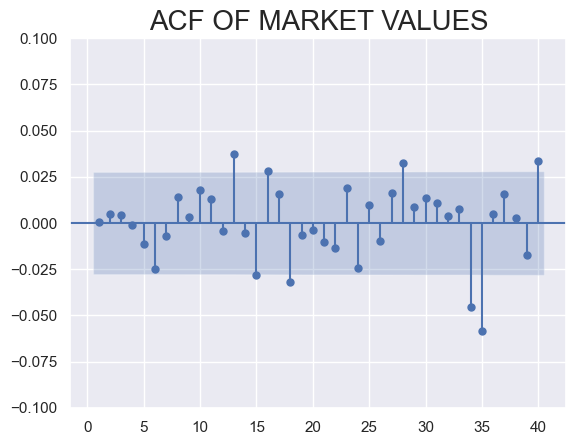

In [133]:
sgt.plot_acf(df.res_ret_ar_3_ma_4[2:], zero = False, lags = 40)
plt.title("ACF OF MARKET VALUES", size = 20)
plt.ylim(-0.1,0.1)
plt.show()

## since returns being stationary data outperforms the arma on prices which is non-stationary data 